In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop('Outcome',axis=1)
y=df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

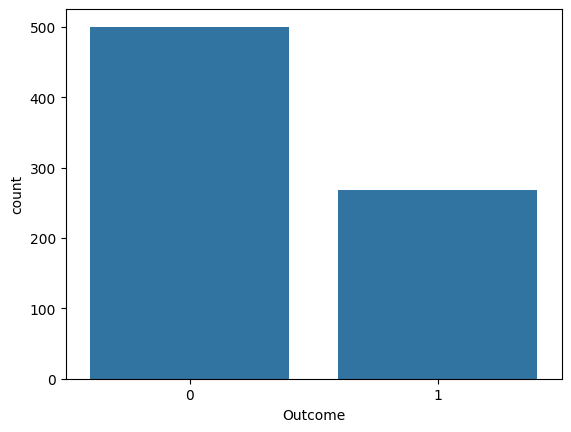

In [5]:
sns.countplot(x=y)

In [6]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=41)

In [9]:
x.shape

(768, 8)

In [10]:
x_train.shape

(576, 8)

In [11]:
x_test.shape

(192, 8)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [14]:
y_pred = knn.predict(x_test)

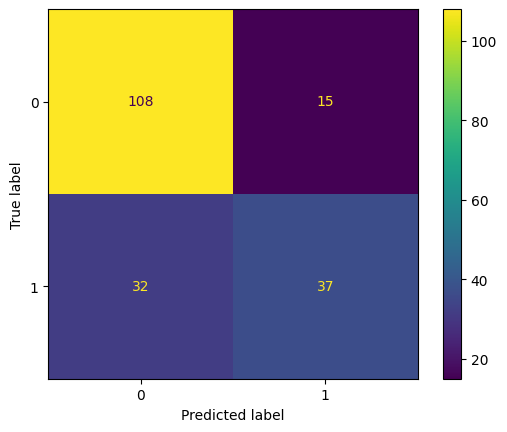

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       123
           1       0.71      0.54      0.61        69

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

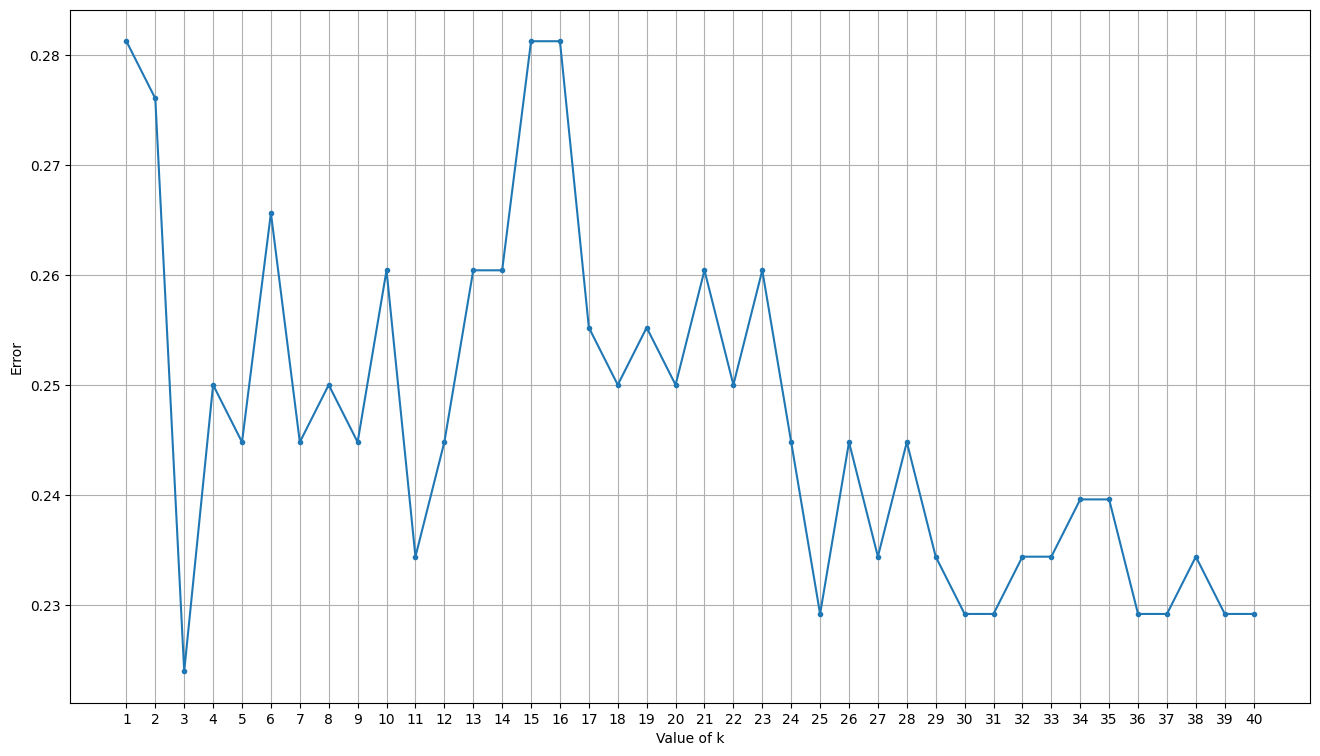

In [19]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker=".")

In [20]:
KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [21]:
y_pred = knn.predict(x_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       123
           1       0.82      0.46      0.59        69

    accuracy                           0.77       192
   macro avg       0.79      0.70      0.72       192
weighted avg       0.78      0.77      0.75       192



In [23]:
error

[0.28125,
 0.2760416666666667,
 0.22395833333333334,
 0.25,
 0.24479166666666666,
 0.265625,
 0.24479166666666666,
 0.25,
 0.24479166666666666,
 0.2604166666666667,
 0.234375,
 0.24479166666666666,
 0.2604166666666667,
 0.2604166666666667,
 0.28125,
 0.28125,
 0.2552083333333333,
 0.25,
 0.2552083333333333,
 0.25,
 0.2604166666666667,
 0.25,
 0.2604166666666667,
 0.24479166666666666,
 0.22916666666666666,
 0.24479166666666666,
 0.234375,
 0.24479166666666666,
 0.234375,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.234375,
 0.23958333333333334,
 0.23958333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22916666666666666]